<a href="https://colab.research.google.com/github/GonzalezJulianBautista/Data-Science-Portfolio/blob/main/LIMPIEZA_DE_DATOS_(PYTHON)_AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LIMPIEZA DE DATOS (PYTHON) - Listados Airbnb**

**Contenido:** 

* Presentación
* Carga de datos 
* Limpieza de datos: 
  * Interpretación
  * Limpieza
* Transformación de datos: 
  * Análisis columna por columna
  * Transformación
* Conclusiones 
* Carga de datos


## **PRESENTACIÓN**

Presentamos el proyecto, la metodología, el contexto y los objetivos. 

* **Limpieza de Datos**

A continuación, se realizarán las tareas de carga, limpieza y transformación de dos datasets: **listado y reviews**.

* **Fuente de los datos**

Los datasets se extraerán directamente de un [repositorio Github](https://github.com/al34n1x/DataScience/tree/master/data) que contiene una variedad de datasets para explotar.

* **Contenido**

Ambos datasets, extraídos en formato csv, contienen datos del sitio web de Airbnb. Cubren toda la información de listados y reseñas para las publicaciones en las Islas Baleares, España.  


* **Qué es Airbnb?** 

Airbnb es un mercado comunitario que sirve para publicar, dar publicidad y reservar alojamiento de forma económica en más de 190 países a través de internet. Es uno de los sistemas mas exitosos de intercambio de servicios de alojamiento entre particulares a través de plataformas digitales. 


* **Objetivo**
El objetivo del siguiente proyecto será realizar el las tareas de acondicionamiento de los datos de ambos datasets, a la vez que se plasma el desarrollo, segmento por segmento y de la forma más clara y concisa posible.
Esto lo haremos: 
  * **Desde el punto de vista técnico y práctico:** Utilizando herramientas y librerías de explotación de datos importados directamente a Python.

  * **Desde el punto de vista expositivo:** Complementando las celdas de código con celdas de texto y comentarios a lo largo  todo el proceso, además de realizar la adecuada división en segmentos del notebook, para mejor seguimiento de la metodología de trabajo. 

* **¿Por qué limpiamos los datos?**

El sentido de este notebook es exhibir la importancia de un buen proceso de limpieza de los datos, los cuales muchas veces llegan al analista con lo que se conoce como "ruido" y espacios en blanco. Un buen proceso de limpieza y transformación es sinónimo de un buen proceso de análisis y visualización posterior.


* **Notas Técnicas**

1. **Sobre la utilización del método .unique():**  A lo largo del notebook, se utilizó el método .unique() para adentrarnos en detalle en el contenido de cada columna y tener en cuenta **cómo afecta el data input** **manual** **de los usuarios en la calidad de los datos y su posible agrupación.** El output de dicha función no fue incluído en el desarrollo de las instancias mencionadas, en cambio, el método .head() representa ese paso. Esto es así por dos principales motivos: 

  1. El DataFrame listado contiene, inicialmente, 98 columnas.  
  2. El método .head() muestra el DataFrame de forma muchísimo más prolija que si intentásemos mostrar columna por columna el output del método .unique(), que puede llegar a devolver un array de hasta 3 mil valores, el cual obstruiría la fluidez en la explicación.

  Con lo cual, cada vez que se utilice el método .head() y/o **se realice una afirmación sobre el contenido de una columna**, la misma está fundamentada sobre una revisión en detalle de la columna con el método unique(). 

## **CARGA DE DATOS**

Extraemos los datos e importamos las librerías a utilizar.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import seaborn as sns
import sys
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
pip install geopandas

     |████████████████████████████████| 994 kB 37.3 MB/s 
     |████████████████████████████████| 6.3 MB 14.9 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


* listado: DataFrame que contiene la información detallada de los listados en Islas Baleares. 
* reviews: DataFrame que contiene la información detallada de las reseñas en Islas Baleares.

In [ ]:
listado = pd.read_csv('https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2021/examen_listado.csv', delimiter = ',')
reviews = pd.read_csv('https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2021/examen_reviews.csv', delimiter = ',')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,13,21,24,25,32,35,40,53,54,59,70,71,72,74) have mixed types.Specify dtype option on import or set low_memory=False.



## **LIMPIEZA DE DATOS**

Para el primer paso del proyecto, realizaremos la limpieza de los datos. Se trabajará en 2 segmentos:

* **Interpretación y descarte.**  
* **Limpieza.**

### INTERPRETACIÓN

Empezamos familiarizándonos con las columnas en los dataset, para entender qué representa cada valor. Esto nos ayudará a evitar caer en un análisis pobre de los datos una vez lleguemos a esa instancia. 


#### **Explicación del paso**


El dataframe listado contiene 98 columnas y 16774 entries. 

In [ ]:
listado.shape

(16774, 98)

Si revisamos los nombres de las 98 columnas, podemos deducir ciertos subsets de columnas para poder hacer el desarrollo de este paso lo más claro y ameno posible. 

In [ ]:
listado.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'thumbnail_url', 'medium_url', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleanin

Así, podemos dividir las columnas en: 

*NOTA: Las columnas resaltadas están a manera de representativas para que se entienda mejor en la exposición el contenido de cada subset.*

* **Información básica de la publicación (14 columnas):** 
'id', **'name'**, 'summary', 'space', **'description'**, 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', **'house_rules'**,   'thumbnail_url', 'medium_url'

* **Información del host (15 columnas):** 'host_id', **'host_name'**, 'host_since', 'host_location', **'host_about'**, 'host_response_time', 'host_response_rate', 'host_acceptance_rate', **'host_is_superhost'**, 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified'

* **Información geográfica de la publicación (14 columnas):** 'street', 'neighbourhood', **'neighbourhood_cleansed'**, 'neighbourhood_group_cleansed', 'city', 'state', **'zipcode'**,  'market', 'smart_location', 'country_code', 'country', **'latitude'**, **'longitude'**, 'is_location_exact'

* **Información de la propiedad y el alquiler (31 columnas):** 'property_type', 'room_type', 'accommodates', **'bathrooms'**, 'bedrooms', **'beds'**, 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', **'guests_included'**, 'extra_people', **'minimum_nights'**, 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped'

* **Información Reviews (11 columnas):** **'number_of_reviews'**, 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', **'review_scores_communication'**, **'review_scores_location'**, 'review_scores_value'

* **Otros (13 columnas):** 'requires_license', **'license'**, 'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', **'require_guest_profile_picture'**, 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month'

Para cada subset, realizaremos: 

* **Una revisión general del contenido de cada columna:** 
  * ¿Qué tipo de variables contienen? 
  * ¿Qué preguntas se podrían llegar a responder con la información de esa columna? 
  * ¿La información que aporta la columna es única dentro del subset o incluso del dataframe? ¿O está contenida en otras columnas?

* **Un relevamiento de la presencia de NaN's en las columnas:**
  * ¿Qué porcentaje de NaN's presenta la columna?
  * Dado el porcentaje de NaN's reportado: ¿Hay que eliminar la columna?

#### **Implementación**

###### **Información básica de la publicación**

* Revisión general.
* Relevamiento de NaN's por columna. 

Creamos el subset para la revisión general. 

In [ ]:
listado_info_basica = pd.DataFrame(listado[['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
                                            'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
                                            'house_rules', 'thumbnail_url', 'medium_url']])
listado_info_basica.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url
0,100831,HOUSE IN MALLORCA - WiFi(ET-3045),NaN,House situated in a quiet area of Ca'n Picafor...,House situated in a quiet area of Ca'n Picafor...,none,NaN,NaN,NaN,NaN,NaN,Que disfruten su estancia en nuestra casa.,NaN,NaN
1,105891,VILLAGE HOUSE WITH POOL: IDEAL FOR FAMILIES,The house is a street on the outskirts of the ...,"House, ground floor, situated in a small town ...",The house is a street on the outskirts of the ...,none,The village's population does not reach two th...,"On arrival at the house, the owner will inform...",It is advisable to rent a car when you arrive ...,"It is a ground floor house with porch, terrace...",I usually go once every four days for the main...,I hope to correct behavior of my guests with n...,NaN,NaN
2,106833,Villa with a big pool in Mallorca,NaN,This is a restored old building situated in th...,This is a restored old building situated in th...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,130669,Room great apartment,Located in a residential neighbourhood and 10m...,"Located in a beautiful area of palma, (Bonanov...",Located in a residential neighbourhood and 10m...,none,"Located in the center of the city, within minu...","Summer is here, fun, fun and more fun, what el...","Bus stop out the building, free parking on street",NaN,"Great place near plaza Espana, bars, cafes",Respect on property and neighbours,NaN,NaN
4,158925,"Casa M, a must in Majorca south",Pouvez-vous lire le résumé publié avec la prem...,Two independant bedrooms with bathrooms en sui...,Pouvez-vous lire le résumé publié avec la prem...,none,"Tout. L'isolement de la maison d'abord, un oas...",Sans doute mais au fil de la demande. He suis ...,Il faut louer une voiture à Son Sant Juan ( aé...,À leur chambre indépendante avec salle-de-bain...,Bien entendu! J 'essaie toujours de leur faire...,Cada uno puede llevar su vida de forma indepen...,NaN,NaN


Generamos la tabla de porcentaje de NaN. 

In [ ]:
missings_info_basica = listado_info_basica.isnull().sum() * 100 / len(listado_info_basica)
listado_missing_info_basica = pd.DataFrame({'column_name': listado_info_basica.columns,
                                 'missings_info_basica': missings_info_basica})

listado_missing_info_basica.sort_values('missings_info_basica', ascending = False, inplace=True)

listado_missing_info_basica.head(14)

,column_name,missings_info_basica
thumbnail_url,thumbnail_url,100.000000
medium_url,medium_url,99.994038
access,access,63.497079
transit,transit,60.444736
interaction,interaction,60.063193
neighborhood_overview,neighborhood_overview,52.366758
notes,notes,48.074401
house_rules,house_rules,36.592345
space,space,22.713724
summary,summary,2.605222


Para mejorar la toma de decisiones, graficamos la tabla de NaN's. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



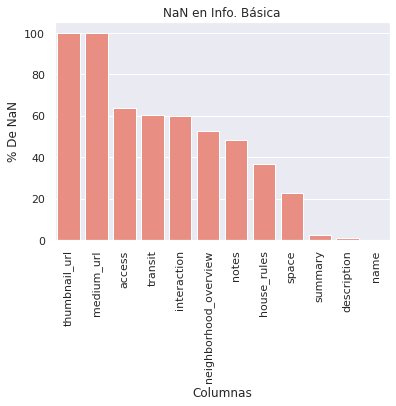

In [ ]:
prod_count_basica = pd.DataFrame(listado_missing_info_basica.sort_index().head(20))
plt.figure()
sns.set_theme(style="darkgrid")
sns.barplot(listado_missing_info_basica[:12].index, 
            listado_missing_info_basica[:12]['missings_info_basica'].values, alpha=1, color = 'Salmon')
plt.title('NaN en Info. Básica')
plt.ylabel('% De NaN', fontsize=12)
plt.xlabel('Columnas', fontsize=12)
plt.xticks(rotation=90)
plt.show()

De las 14 columnas del subset nos quedamos con la(s) siguiente(s): 

* 'id': identificador del listado, puede ser usado para JOIN's. 

Y descartamos: 

* 'name': Una descripción textual de la publicación, especialmente del alojamiento en cuestión, no es necesaria. La información que pueda contener esta columna estará presente en columnas específicas como pueden ser habitaciones, ubicación, ammenities, etc. 
* 'summary': Mismo que 'name'.
* 'space': Mismo que 'name'.
* 'description': Mismo que 'name'.
* 'experiences_offered': Mismo que 'name'. 
* 'neighborhood_overview': La explotación de esta columna en un dato utilizable llevaría mucho tiempo. 
* 'notes': Mismo que 'neighborhood_overview'.
* 'transit': Mismo que 'neighborhood_overview'.
* 'access': Mismo que 'neighborhood_overview'.
* 'interaction': Mismo que 'neighborhood_overview'.
* 'house_rules': Mismo que 'neighborhood_overview'.
* 'thumbnail_url': NaN. 
* 'medium_url': Nan.

##### **Información del host**

* Revisión general.
* Relevamiento de NaN's por columna. 

In [ ]:
listado_info_host = pd.DataFrame(listado[['host_id', 'host_name', 'host_since', 'host_location',
                                            'host_about', 'host_response_time', 'host_response_rate',
                                            'host_acceptance_rate', 'host_is_superhost', 
                                            'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
                                            'host_verifications', 'host_has_profile_pic', 'host_identity_verified']])
listado_info_host.head()

,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
0,529151.0,Miguel,2011-04-23,Mallorca,Somos una pareja con los mismos gustos e inter...,within a few hours,100%,NaN,f,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t
1,549192.0,Bartomeu,2011-05-01,"Ariany, Balearic Islands, Spain",Hola!. Resido en una casa de campo de un puebl...,within an hour,100%,NaN,t,NaN,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t
2,551974.0,Xisco,2011-05-02,"Palma de Mallorca, Balearic Islands, Spain",I'm Xisco. I love Mallorcan way of life.,within a day,100%,NaN,f,NaN,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f
3,643065.0,Nick,2011-05-30,"Palma de Mallorca, Balearic Islands, Spain",NaN,within a day,57%,NaN,f,NaN,3.0,3.0,"['email', 'phone', 'reviews']",t,f
4,673756.0,Marie,2011-06-07,"Palma, Balearic Islands, Spain","Hola, me llamo Marie. Despues de haber viajad...",within an hour,100%,NaN,f,NaN,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f


In [ ]:
missings_info_host = listado_info_host.isnull().sum() * 100 / len(listado_info_host)
listado_missing_info_host = pd.DataFrame({'column_name': listado_info_host.columns,
                                 'missings_info_host': missings_info_host})

listado_missing_info_host.sort_values('missings_info_host', ascending = False, inplace=True)

listado_missing_info_host.head(14)

,column_name,missings_info_host
host_acceptance_rate,host_acceptance_rate,99.994038
host_neighbourhood,host_neighbourhood,98.444021
host_about,host_about,34.517706
host_response_time,host_response_time,6.885656
host_response_rate,host_response_rate,6.885656
host_location,host_location,0.220579
host_is_superhost,host_is_superhost,0.041731
host_listings_count,host_listings_count,0.041731
host_total_listings_count,host_total_listings_count,0.041731
host_has_profile_pic,host_has_profile_pic,0.041731


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



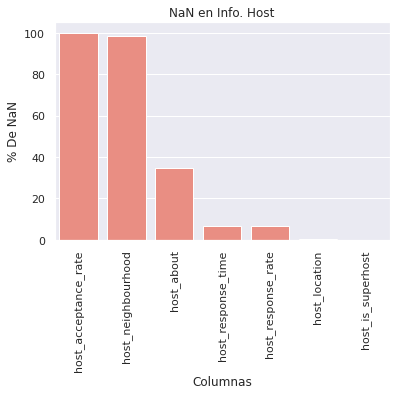

In [ ]:
prod_count_host = pd.DataFrame(listado_missing_info_host.sort_index().head(20))
plt.figure()
sns.set_theme(style="darkgrid")
sns.barplot(listado_missing_info_host[:7].index, 
            listado_missing_info_host[:7]['missings_info_host'].values, alpha=1, color = 'Salmon')
plt.title('NaN en Info. Host')
plt.ylabel('% De NaN', fontsize=12)
plt.xlabel('Columnas', fontsize=12)
plt.xticks(rotation=90)
plt.show()

De las 15 columnas del subset nos quedamos con la(s) siguiente(s): 

* 'host_name': Podemos usar el nombre del host para filtrar reviews de sus publicaciones. 
* 'host_since': Variable de serie temporal a la que se le puede dar uso. 
* 'host_location': Variable de ubicación a la que se le puede dar uso. 
* 'host_about': Variable de la cual se pueden extraer palabras clave. 
* 'host_is_superhost': Booleano que puede ser muy útil en la etapa de análisis. [Qué es un 'SuperHost'?](https://www.airbnb.es/help/article/828/qu%C3%A9-es-un-superhost)
* 'host_has_profile_pic': Mismo que 'host_is_superhost'
* 'host_identity_verified': Mismo que 'host_is_superhost'

Y descartamos: 

* 'host_id': No sirve como identificador. 
* 'host_response_time': La calidad de comunicación con el host está comprendido en la columna score_communication.
* 'host_response_rate': Mismo que 'host_response_time'.
* 'host_acceptance_rate':  NaN.
* 'host_neighbourhood': Utilizaremos la columna 'host_location', NaN.
* 'host_listings_count': Podemos calcularlo nosotros mismos. 
* 'host_total_listings_count': Mismo que 'host_listings_count'
* 'host_verifications': Comprende el booleano 'host_identity_verified'



##### **Información geográfica de la publicación**

* Revisión general.
* Relevamiento de NaN's por columna. 

In [ ]:
listado_info_geo = pd.DataFrame(listado[['street', 'neighbourhood', 'neighbourhood_cleansed', 
                                         'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
                                         'market', 'smart_location', 'country_code', 'country',
                                         'latitude', 'longitude', 'is_location_exact']])
listado_info_geo.head()

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact
0,"Can Picafort, Illes Balears, Spain",NaN,Santa Margalida,NaN,Can Picafort,Illes Balears,07458,Mallorca Island,"Can Picafort, Spain",ES,Spain,39.76347,3.16255,f
1,"Maria de la Salut, Balearic Islands, Spain",NaN,Maria de la Salut,NaN,Maria de la Salut,Balearic Islands,07519,Mallorca Island,"Maria de la Salut, Spain",ES,Spain,39.66044,3.07165,t
2,"Sant Llorenç des Cardassar, Spain",NaN,Sant Llorenç des Cardassar,NaN,Sant Llorenç des Cardassar,NaN,07530,Mallorca Island,"Sant Llorenç des Cardassar, Spain",ES,Spain,39.616,3.30121,f
3,"Palma de Mallorca, PM, Spain",NaN,Palma de Mallorca,NaN,Palma de Mallorca,PM,07015,Mallorca Island,"Palma de Mallorca, Spain",ES,Spain,39.56478,2.60333,f
4,"Campos, Balearic Islands, Spain",NaN,Campos,NaN,Campos,Balearic Islands,07630,Mallorca Island,"Campos, Spain",ES,Spain,39.396609999999995,3.08728,t


In [ ]:
missings_info_geo = listado_info_geo.isnull().sum() * 100 / len(listado_info_geo)
listado_missing_info_geo = pd.DataFrame({'column_name': listado_info_geo.columns,
                                 'missings_info_geo': missings_info_geo})

listado_missing_info_geo.sort_values('missings_info_geo', ascending = False, inplace=True)

listado_missing_info_geo.head(14)

,column_name,missings_info_geo
neighbourhood,neighbourhood,99.994038
neighbourhood_group_cleansed,neighbourhood_group_cleansed,99.994038
state,state,17.211160
zipcode,zipcode,2.557530
city,city,0.166925
market,market,0.017885
street,street,0.005962
neighbourhood_cleansed,neighbourhood_cleansed,0.005962
smart_location,smart_location,0.005962
country_code,country_code,0.005962


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



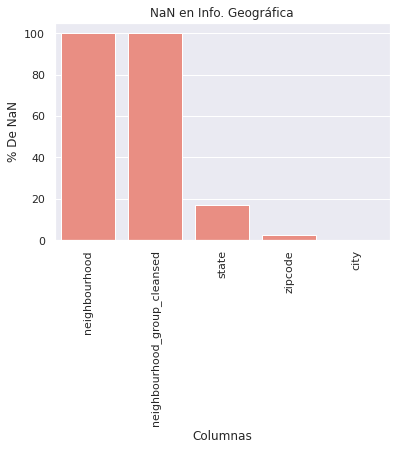

In [ ]:
prod_count_geo = pd.DataFrame(listado_missing_info_geo.sort_index().head(20))
plt.figure()
sns.set_theme(style="darkgrid")
sns.barplot(listado_missing_info_geo[:5].index, 
            listado_missing_info_geo[:5]['missings_info_geo'].values, alpha=1, color = 'Salmon')
plt.title('NaN en Info. Geográfica')
plt.ylabel('% De NaN', fontsize=12)
plt.xlabel('Columnas', fontsize=12)
plt.xticks(rotation=90)
plt.show()

De las 14 columnas del subset nos quedamos con la(s) siguiente(s): 


* 'neighbourhood_cleansed': Variable procesada que nos permitirá ubicar las publicaciones geográficamente. 
* 'latitude': Mismo que 'neighbourhood_cleansed'.
* 'longitude': Mismo que 'neighbourhood_cleansed'.

Y descartamos: 

* 'neighbourhood': NaN
* 'neighbourhood_group_cleansed': NaN
* 'city': Vamos a usar 'neighbourhood_cleansed'.
* 'street': Mismo que 'city'.
* 'zipcode': Mismo que 'city'.
* 'smart_location': Mismo que 'city'. 
* 'state': Islas Baleares, Illes Balears.
* 'market' Mallorca Island.
* 'country_code': ES.
* 'country': Spain, España.
* 'is_location_exact': No sirve ya que contiene un margen de error de hasta 150 metros. [Airbnb Disclaimers](http://insideairbnb.com/about.html#disclaimers)





##### **Información de la propiedad y el alquiler**

* Revisión general.
* Relevamiento de NaN's por columna. 

In [ ]:
listado_info_alquiler = pd.DataFrame(listado[['property_type', 'room_type', 'accommodates', 'bathrooms', 
                                         'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
                                         'price', 'weekly_price', 'monthly_price', 'security_deposit',
                                         'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
                                         'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
                                         'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
                                         'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 
                                         'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped']])
listado_info_alquiler.head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped
0,House,Entire home/apt,8.0,3.0,4.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$155.00,NaN,NaN,$0.00,$100.00,1.0,$0.00,4,365.0,4.0,4.0,365.0,365.0,4.0,365.0,today,t,0.0,0,0,0,2019-06-27
1,Townhouse,Entire home/apt,6.0,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",NaN,$90.00,NaN,NaN,NaN,NaN,4.0,$10.00,7,365.0,7.0,7.0,365.0,365.0,7.0,365.0,today,t,0.0,4,10,248,2019-06-27
2,Villa,Entire home/apt,5.0,NaN,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$84.00,NaN,NaN,NaN,$100.00,1.0,$0.00,5,365.0,5.0,5.0,365.0,365.0,5.0,365.0,today,t,0.0,6,19,294,2019-06-27
3,Apartment,Private room,2.0,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Eleva...",NaN,$110.00,$426.00,"$1,600.00",$0.00,$25.00,1.0,$0.00,2,365.0,2.0,2.0,365.0,365.0,2.0,365.0,2 weeks ago,t,7.0,31,31,300,2019-06-27
4,Villa,Private room,3.0,1.0,1.0,3.0,Real Bed,"{TV,Wifi,Pool,Kitchen,""Free parking on premise...",NaN,$120.00,$780.00,NaN,$200.00,$40.00,2.0,$10.00,3,30.0,3.0,3.0,30.0,30.0,3.0,30.0,3 months ago,t,19.0,37,60,240,2019-06-27


In [ ]:
missings_info_alquiler = listado_info_alquiler.isnull().sum() * 100 / len(listado_info_alquiler)
listado_missing_info_alquiler = pd.DataFrame({'column_name': listado_info_alquiler.columns,
                                 'missings_info_alquiler': missings_info_alquiler})

listado_missing_info_alquiler.sort_values('missings_info_alquiler', ascending = False, inplace=True)

listado_missing_info_alquiler.head(14)

,column_name,missings_info_alquiler
square_feet,square_feet,98.640754
monthly_price,monthly_price,97.955169
weekly_price,weekly_price,96.804579
security_deposit,security_deposit,25.283176
cleaning_fee,cleaning_fee,24.818171
beds,beds,0.506737
bedrooms,bedrooms,0.059616
bathrooms,bathrooms,0.047693
availability_30,availability_30,0.011923
has_availability,has_availability,0.011923


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



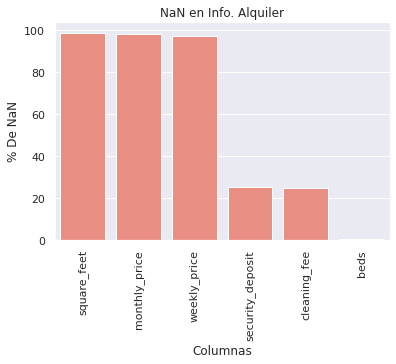

In [ ]:
prod_count_alquiler = pd.DataFrame(listado_missing_info_alquiler.sort_index().head(20))
plt.figure()
sns.set_theme(style="darkgrid")
sns.barplot(listado_missing_info_alquiler[:6].index, 
            listado_missing_info_alquiler[:6]['missings_info_alquiler'].values, alpha=1, color = 'Salmon')
plt.title('NaN en Info. Alquiler')
plt.ylabel('% De NaN', fontsize=12)
plt.xlabel('Columnas', fontsize=12)
plt.xticks(rotation=90)
plt.show()

De las 31 columnas del subset nos quedamos con la(s) siguiente(s): 

* 'property_type': Variable categórica. 
* 'room_type': Variable categórica. 
* 'accommodates': Variable numérica. 
* 'bathrooms': Variable numérica. 
* 'bedrooms': Variable numérica. 
* 'beds': Variable numérica. 
* 'bed_type': Variable categórica. 
* 'amenities': Se puede llegar a filtrar por ciertas amenities. 
* 'price': Costo por noche. 
* 'security_deposit': Costo relevante. 
* 'cleaning_fee': Mismo que 'security_deposit'. 
* 'guests_included': Variable numérica. 
* 'extra_people': Costo relevante. 
* 'minimum_nights': Variable numérica. 

Y descartamos: 

* 'square_feet': NaN
* 'weekly_price': NaN. 
* 'monthly_price': NaN.  
* 'maximum_nights': Valores altos, generlmente 365. 
* 'minimum_minimum_nights': Valor repetido. 
* 'maximum_minimum_nights': Valor repetido.
* 'minimum_maximum_nights': Valor repetido.
* 'maximum_maximum_nights': Valor repetido.
* 'minimum_nights_avg_ntm': Valor repetido.
* 'maximum_nights_avg_ntm': Valor repetido.
* 'calendar_updated': Variable que se actualiza constantemente, no la podemos explotar. 
* 'has_availability': Mismo que 'calendar_updated'.
* 'availability_30': Mismo que 'calendar_updated'.
* 'availability_60': Mismo que 'calendar_updated'.
* 'availability_90': Mismo que 'calendar_updated'.
* 'availability_365': Mismo que 'calendar_updated'.
* 'calendar_last_scraped': Mismo que 'calendar_updated'.

##### **Información Reviews**

* Revisión general.
* Relevamiento de NaN's por columna. 

In [ ]:
listado_info_reviews = pd.DataFrame(listado[['number_of_reviews', 'number_of_reviews_ltm', 'first_review',
                                              'last_review', 'review_scores_rating', 'review_scores_accuracy',
                                              'review_scores_cleanliness', 'review_scores_checkin',
                                              'review_scores_communication', 'review_scores_location', 'review_scores_value']])
listado_info_reviews.head()

,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,20,20.0,2018-10-06,2019-04-27,99.0,10.0,10.0,10.0,10.0,9.0,10.0
1,13,4.0,2012-06-19,2019-05-09,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,9,2.0,2012-06-05,2018-08-13,98.0,10.0,10.0,10.0,10.0,9.0,9.0
3,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37,9.0,2012-06-14,2018-10-07,94.0,10.0,9.0,10.0,10.0,9.0,9.0


In [ ]:
missings_info_reviews = listado_info_reviews.isnull().sum() * 100 / len(listado_info_reviews)
listado_missing_info_reviews = pd.DataFrame({'column_name': listado_info_reviews.columns,
                                 'missings_info_reviews': missings_info_reviews})

listado_missing_info_reviews.sort_values('missings_info_reviews', ascending = False, inplace=True)

listado_missing_info_reviews.head(14)

,column_name,missings_info_reviews
review_scores_value,review_scores_value,41.665673
review_scores_checkin,review_scores_checkin,41.653750
review_scores_location,review_scores_location,41.653750
review_scores_communication,review_scores_communication,41.647788
review_scores_accuracy,review_scores_accuracy,41.623942
review_scores_cleanliness,review_scores_cleanliness,41.617980
review_scores_rating,review_scores_rating,41.600095
first_review,first_review,40.199118
last_review,last_review,40.199118
number_of_reviews,number_of_reviews,0.005962


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



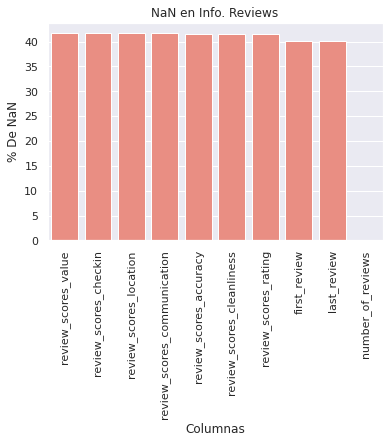

In [ ]:
prod_count_reviews = pd.DataFrame(listado_missing_info_reviews.sort_index().head(20))
plt.figure()
sns.set_theme(style="darkgrid")
sns.barplot(listado_missing_info_reviews[:10].index,
            listado_missing_info_reviews[:10]['missings_info_reviews'].values, alpha=1, color = 'Salmon')
plt.title('NaN en Info. Reviews')
plt.ylabel('% De NaN', fontsize=12)
plt.xlabel('Columnas', fontsize=12)
plt.xticks(rotation=90)
plt.show()

De las 11 columnas del subset nos quedamos con la(s) siguiente(s): 

* 'number_of_reviews': Cantidad de reviews de la publicación. 
* 'first_review': Variable de serie temporal a la que se le puede dar uso. 
* 'last_review': Mismo que 'first_review'. 
* 'review_scores_XXX': Vamos a intentar usar todas las variables de este tipo, aunque presenten un valor alto de NaN. 

Y descartamos: 

'number_of_reviews_ltm': Valor repetido. 

##### **Otros**

* Revisión general.
* Relevamiento de NaN's por columna. 

In [ ]:
listado_info_otros = pd.DataFrame(listado[['requires_license', 'license', 'jurisdiction_names',
                                             'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
                                             'require_guest_profile_picture', 'require_guest_phone_verification',
                                             'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                                             'calculated_host_listings_count_private_rooms', 
                                             'calculated_host_listings_count_shared_rooms', 'reviews_per_month']])
listado_info_otros.head()

,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,t,ETV-3045,NaN,t,f,strict_14_with_grace_period,f,f,1.0,1.0,0.0,0.0,2.26
1,t,ETV/6127,NaN,t,f,strict_14_with_grace_period,f,t,2.0,2.0,0.0,0.0,0.15
2,t,ET/1961,NaN,f,f,strict_14_with_grace_period,f,f,1.0,1.0,0.0,0.0,0.10
3,t,NaN,NaN,t,f,flexible,f,f,3.0,0.0,3.0,0.0,NaN
4,t,ETV 6561,NaN,t,f,strict_14_with_grace_period,f,f,3.0,0.0,3.0,0.0,0.43


In [ ]:
missings_info_otros = listado_info_otros.isnull().sum() * 100 / len(listado_info_otros)
listado_missing_info_otros = pd.DataFrame({'column_name': listado_info_otros.columns,
                                 'missings_info_otros': missings_info_otros})

listado_missing_info_otros.sort_values('missings_info_otros', ascending = False, inplace=True)

listado_missing_info_otros.head(14)

,column_name,missings_info_otros
jurisdiction_names,jurisdiction_names,100.000000
reviews_per_month,reviews_per_month,40.205079
license,license,37.152736
requires_license,requires_license,0.011923
instant_bookable,instant_bookable,0.011923
is_business_travel_ready,is_business_travel_ready,0.011923
cancellation_policy,cancellation_policy,0.011923
require_guest_profile_picture,require_guest_profile_picture,0.011923
require_guest_phone_verification,require_guest_phone_verification,0.011923
calculated_host_listings_count,calculated_host_listings_count,0.011923


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



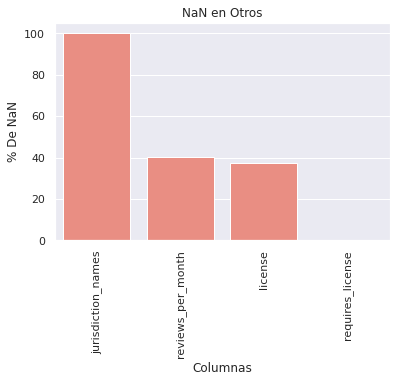

In [ ]:
prod_count_otros = pd.DataFrame(listado_missing_info_otros.sort_index().head(20))
plt.figure()
sns.set_theme(style="darkgrid")
sns.barplot(listado_missing_info_otros[:4].index, 
            listado_missing_info_otros[:4]['missings_info_otros'].values, alpha=1, color = 'Salmon')
plt.title('NaN en Otros')
plt.ylabel('% De NaN', fontsize=12)
plt.xlabel('Columnas', fontsize=12)
plt.xticks(rotation=90)
plt.show()

De las 13 columnas del subset nos quedamos con la(s) siguiente(s): 


* 'instant_bookable': Booleano que puede ser útil en la etapa de análisis. 
* 'is_business_travel_ready': Solo contiene 'f'.
* 'cancellation_policy': Variable categórica. 
* 'require_guest_profile_picture': Booleano que puede ser útil en la etapa de análisis. 
* 'require_guest_phone_verification': Booleano que puede ser útil en la etapa de análisis. 
* 'calculated_host_listings_count': Variable numérica que puede ser útil en la etapa de análisis. 


Y descartamos: 

* 'requires_license': Todos los valores son t. 
* 'reviews_per_month': NaN
* 'license': NaN
* 'jurisdiction_names': NaN
* 'calculated_host_listings_count_entire_homes': Comprendida en 'calculated_host_listings_count'
* 'calculated_host_listings_count_private_rooms' : Comprendida en 'calculated_host_listings_count'
* 'calculated_host_listings_count_shared_rooms': Comprendida en 'calculated_host_listings_count'





#### **Conclusión y creación del DataFrame**

Terminada la interpretación de los datos y el primer filtro de columnas, creamos el dataframe del dataset listado, que está formado por las columnas ahora consideradas relevantes. 

In [ ]:
df_listado = pd.DataFrame(listado[['id' ,'host_name', 'host_since', 'host_location', 
                                    'host_about','host_is_superhost', 'host_has_profile_pic',
                                    'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 
                                    'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 
                                    'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 
                                    'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews',
                                    'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                                    'review_scores_value', 'instant_bookable' , 'is_business_travel_ready', 'cancellation_policy', 
                                    'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count']])

df_listado.head(2)

,id,host_name,host_since,host_location,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,100831,Miguel,2011-04-23,Mallorca,Somos una pareja con los mismos gustos e inter...,f,t,t,Santa Margalida,39.76347,3.16255,House,Entire home/apt,8.0,3.0,4.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$155.00,$0.00,$100.00,1.0,$0.00,4,20,2018-10-06,2019-04-27,99.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,strict_14_with_grace_period,f,f,1.0
1,105891,Bartomeu,2011-05-01,"Ariany, Balearic Islands, Spain",Hola!. Resido en una casa de campo de un puebl...,t,t,t,Maria de la Salut,39.66044,3.07165,Townhouse,Entire home/apt,6.0,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",$90.00,NaN,NaN,4.0,$10.00,7,13,2012-06-19,2019-05-09,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,strict_14_with_grace_period,f,t,2.0


In [ ]:
df_listado.shape

(16774, 41)

Redujimos a 41 las columnas del dataframe original, y ahora podemos comenzar con la limpieza. 

### LIMPIEZA

Una vez adentrados en el contexto del dataset, realizamos la limpieza necesaria para poder pasar a la transformación de los datos y luego explotar el dataframe. 

#### **Explicación del paso**

El dataframe listado contiene 41 columnas y 16774 entries. Estas columnas pasaron por un primer paso de interpretación, sin embargo, aún hay varias preguntas que hacerse respecto a la calidad de los datos: 

* **¿Qué decisión hay que tomar respecto a las columnas que todavía presentan datos NaN?**
* **¿Son convenientes los dtypes actuales de los datos en las columnas? ¿Qué columnas vale la pena llevar al paso siguiente de transformación?**

#### **Implementación**

##### **Análisis NaN**

Repetimos el análisis de porcentaje de NaN's por columna, con su respectivo gráfico, para el df_listado. 

In [ ]:
missings_info_df = df_listado.isnull().sum() * 100 / len(df_listado)
listado_missing_info_df = pd.DataFrame({'column_name': df_listado.columns,
                                 'missings_info_df': missings_info_df})

listado_missing_info_df.sort_values('missings_info_df', ascending = False, inplace=True)

listado_missing_info_df.head(13)

,column_name,missings_info_df
review_scores_value,review_scores_value,41.665673
review_scores_checkin,review_scores_checkin,41.653750
review_scores_location,review_scores_location,41.653750
review_scores_communication,review_scores_communication,41.647788
review_scores_accuracy,review_scores_accuracy,41.623942
review_scores_cleanliness,review_scores_cleanliness,41.617980
review_scores_rating,review_scores_rating,41.600095
first_review,first_review,40.199118
last_review,last_review,40.199118
host_about,host_about,34.517706


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



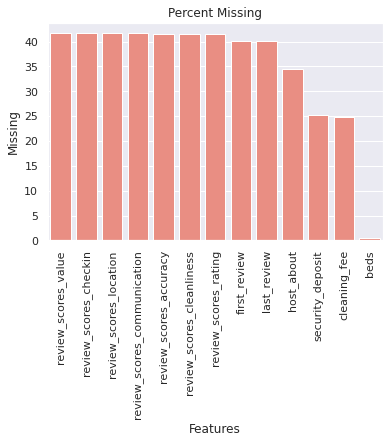

In [ ]:
prod_count_df = pd.DataFrame(listado_missing_info_df.sort_index().head(20))
plt.figure()
sns.set_theme(style="darkgrid")
sns.barplot(listado_missing_info_df[:13].index, 
            listado_missing_info_df[:13]['missings_info_df'].values, alpha=1, color = 'Salmon')
plt.title('Percent Missing')
plt.ylabel('Missing', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

##### **Solución 1: dropna()**

Exploramos una primer solución del proceso de limpieza, donde usamos el método dropna().

###### **Explicación del paso** 

Una posible solución, pensando en vistas al proceso de explotación y análisis de los datos, sería eliminar todos los registros del dataframe que tengan un NaN. 

La lógica detrás de esta decisión sería que una vez nos encontremos en la instancia de análisis, las reviews de las publicaciones y sus diferentes puntajes serán claves para extraer insights y conclusiones relevantes y de alto impacto. 

 * **¿Qué regiones tienen las publicaciones con los mejores puntajes y reviews en cada categoría?**

 * **¿Qué características en común tienen las publicaciones con las mejores reviews/ los mejores puntajes?**

 * **¿Qué puntajes tienen en promedio los SuperHosts?**

Estas preguntas son simplemente para mostrar la importancia que pueden llegar a tener las columnas de puntajes en la instancia de explotación. 

###### **Implementación**

Realizamos entonces la limpieza final, donde descartamos aquellas filas que presentan un NaN con el método dropna(). El gráfico de NaN's nos sugiere que haciendo esto, los registros con puntajes vacíos serán eliminados. 

Pero es importante considerar esto: Las publicaciones con registros nulos en las columnas 'security_deposit' y 'cleaning_fee' también serán eliminadas. ¿Es conveniente esta decisión? O lo mejor será reemplazar los NaN por un valor numérico como puede ser 0, un promedio, una media, etc. 

Como esta decisión es delicada y vamos a revisarla, la implementación del método dropna() se hará sobre un nuevo DataFrame, a llamar df_listado_prueba1. 

In [ ]:
df_listado_solucion1 = df_listado.drop(df_listado[df_listado['number_of_reviews'] == 0].index)

In [ ]:
df_listado_solucion1 = df_listado.dropna()
df_listado_solucion1.shape

(4684, 41)

Una vez aplicado el método, vemos que nos quedamos con 4684 registros, cuando la cantidad inicial era de 16774. Quizás lo mejor sea explorar la opción de reemplazar los valores de 'security_deposit' y 'cleaning_fee', y ver con cuántos registros quedamos luego de implementar el método dropna() y por ende, eliminar los registros sin puntajes solamente. 

###### **Conclusión parcial**

Finalizada la limpieza, así se ve el dataframe de listados, el cual ahora vamos a llevar al proceso de transformación. 

 * **Consiste de 4681 entries en 41 columnas.** 
 * **No presenta NaN's.**
 * **Contiene información sobre el host, información completa y en detalle de la publicación, detalles del alquiler y los puntajes de las mismas en los diferentes apartados de reviews.**


In [ ]:
df_listado_solucion1.head()

,id,host_name,host_since,host_location,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,100831,Miguel,2011-04-23,Mallorca,Somos una pareja con los mismos gustos e inter...,f,t,t,Santa Margalida,39.76347,3.16255,House,Entire home/apt,8.0,3.0,4.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$155.00,$0.00,$100.00,1.0,$0.00,4,20,2018-10-06,2019-04-27,99.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,strict_14_with_grace_period,f,f,1.0
4,158925,Marie,2011-06-07,"Palma, Balearic Islands, Spain","Hola, me llamo Marie. Despues de haber viajad...",f,t,f,Campos,39.396609999999995,3.08728,Villa,Private room,3.0,1.0,1.0,3.0,Real Bed,"{TV,Wifi,Pool,Kitchen,""Free parking on premise...",$120.00,$200.00,$40.00,2.0,$10.00,3,37,2012-06-14,2018-10-07,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,3.0
6,160482,Marga,2011-07-02,"Palma de Mallorca, Balearic Islands, Spain",Married mallorquina with 2 children that loves...,f,t,t,Esporles,39.654140000000005,2.62546,House,Entire home/apt,6.0,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",$175.00,$350.00,$120.00,4.0,$20.00,4,54,2011-08-07,2019-06-10,96.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,t,t,1.0
7,164185,Maria,2011-07-07,"Costa d'en Blanes, Illes Balears, Spain",I am a professional Life and Executive Coach s...,t,t,f,Palma de Mallorca,39.57302,2.64355,Guest suite,Private room,2.0,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",$65.00,$200.00,$30.00,1.0,$15.00,5,95,2011-08-16,2019-04-17,94.0,9.0,9.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,f,f,2.0
8,166820,Toni,2011-07-08,Mallorca - España,"Hi People,\r\nYou know ... I like to have good...",f,t,t,Banyalbufar,39.679320000000004,2.50136,Bed and breakfast,Private room,2.0,1.0,1.0,2.0,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",""Pets live on ...",$35.00,$0.00,$0.00,2.0,$27.00,3,136,2011-08-08,2019-06-08,94.0,10.0,9.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,f,f,4.0


##### **Solución 2: dropna() conservando 'security_deposit' y 'cleaning_fee'**

A partir de lo observado en los resultados de la primer posible solución, repetimos el proceso, esta vez reemplazando 'security_deposit' y 'cleaning_fee' por un valor. 

###### **Explicación del paso**

Para tratar de maximizar la cantidad de entries con las que podemos pasar a la instancia de transformación y posterior análisis, vamos a intentar preservar las instancias donde:
*  Hay datos de puntajes y review. 
*  Hay NaN en las columnas 'security_deposit' y 'cleaning_fee'. 

A favor de esta solución, podemos considerar que: 
* Al ser tarifas los valores que ambas columnas representan, reemplazarlos por 0 no debería quitarle vericidad al análisis. 
* Las columnas no contienen valores elementales para el análisis. 

###### **Implementación**

In [ ]:
df_listado_solucion2 = df_listado
df_listado_solucion2['security_deposit'] = df_listado_solucion2['security_deposit'].fillna(0)
df_listado_solucion2['cleaning_fee'] = df_listado_solucion2['cleaning_fee'].fillna(0)
df_listado_solucion2.drop(df_listado[df_listado['number_of_reviews'] == 0].index)

,id,host_name,host_since,host_location,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,100831,Miguel,2011-04-23,Mallorca,Somos una pareja con los mismos gustos e inter...,f,t,t,Santa Margalida,39.76347,3.16255,House,Entire home/apt,8.0,3.0,4.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$155.00,$0.00,$100.00,1.0,$0.00,4,20,2018-10-06,2019-04-27,99.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,strict_14_with_grace_period,f,f,1.0
1,105891,Bartomeu,2011-05-01,"Ariany, Balearic Islands, Spain",Hola!. Resido en una casa de campo de un puebl...,t,t,t,Maria de la Salut,39.66044,3.07165,Townhouse,Entire home/apt,6.0,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",$90.00,0,0,4.0,$10.00,7,13,2012-06-19,2019-05-09,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,strict_14_with_grace_period,f,t,2.0
2,106833,Xisco,2011-05-02,"Palma de Mallorca, Balearic Islands, Spain",I'm Xisco. I love Mallorcan way of life.,f,t,f,Sant Llorenç des Cardassar,39.616,3.30121,Villa,Entire home/apt,5.0,NaN,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$84.00,0,$100.00,1.0,$0.00,5,9,2012-06-05,2018-08-13,98.0,10.0,10.0,10.0,10.0,9.0,9.0,f,f,strict_14_with_grace_period,f,f,1.0
3,130669,Nick,2011-05-30,"Palma de Mallorca, Balearic Islands, Spain",NaN,f,t,f,Palma de Mallorca,39.56478,2.60333,Apartment,Private room,2.0,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Eleva...",$110.00,$0.00,$25.00,1.0,$0.00,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,flexible,f,f,3.0
4,158925,Marie,2011-06-07,"Palma, Balearic Islands, Spain","Hola, me llamo Marie. Despues de haber viajad...",f,t,f,Campos,39.396609999999995,3.08728,Villa,Private room,3.0,1.0,1.0,3.0,Real Bed,"{TV,Wifi,Pool,Kitchen,""Free parking on premise...",$120.00,$200.00,$40.00,2.0,$10.00,3,37,2012-06-14,2018-10-07,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16569,35813379,Arenal2019,2019-04-08,ES,NaN,f,t,f,Palma de Mallorca,39.5036,2.75189,Apartment,Private room,1.0,1.0,1.0,1.0,Real Bed,"{Kitchen,""Smoking allowed"",Elevator,Essentials...",$49.00,0,0,1.0,$0.00,2,2,2019-06-19,2019-06-25,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,flexible,f,f,3.0
16585,35847888,Estanislao,2018-04-24,"Rosario, Santa Fe Province, Argentina",NaN,f,t,f,Palma de Mallorca,39.5624,2.62716,Apartment,Entire home/apt,4.0,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,W...",$120.00,$0.00,$20.00,1.0,$0.00,2,1,2019-06-23,2019-06-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,flexible,f,f,1.0
16615,35891157,Angelica,2019-06-06,SE,NaN,f,t,f,Alcúdia,39.8169,3.11654,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,"{TV,Kitchen,""Free street parking"",""Indoor fire...",$50.00,0,0,1.0,$0.00,1,1,2019-06-24,2019-06-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,flexible,f,f,1.0
16627,35904222,Teresa,2019-06-19,ES,Hola !!! Sevillana viviendo en Mallorca desde ...,f,t,f,Palma de Mallorca,39.5809,2.66035,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",$55.00,0,$20.00,1.0,$10.00,2,1,2019-06-24,2019-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,2.0


In [ ]:
df_listado_solucion2 = df_listado_solucion2.dropna()
df_listado_solucion2.shape

(6246, 41)

###### **Conclusión y creación del DataFrame**

Finalizada la limpieza, así se ve el dataframe de listados, el cual ahora vamos a llevar al proceso de transformación. 

 * **Consiste de 6246 entries en 41 columnas.** 
 * **No presenta NaN's.**
 * **Contiene información sobre el host, información completa y en detalle de la publicación, detalles del alquiler y los puntajes de las mismas en los diferentes apartados de reviews.**


In [ ]:
df_listado_solucion2.head()

,id,host_name,host_since,host_location,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,100831,Miguel,2011-04-23,Mallorca,Somos una pareja con los mismos gustos e inter...,f,t,t,Santa Margalida,39.76347,3.16255,House,Entire home/apt,8.0,3.0,4.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$155.00,$0.00,$100.00,1.0,$0.00,4,20,2018-10-06,2019-04-27,99.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,strict_14_with_grace_period,f,f,1.0
1,105891,Bartomeu,2011-05-01,"Ariany, Balearic Islands, Spain",Hola!. Resido en una casa de campo de un puebl...,t,t,t,Maria de la Salut,39.66044,3.07165,Townhouse,Entire home/apt,6.0,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",$90.00,0,0,4.0,$10.00,7,13,2012-06-19,2019-05-09,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,strict_14_with_grace_period,f,t,2.0
4,158925,Marie,2011-06-07,"Palma, Balearic Islands, Spain","Hola, me llamo Marie. Despues de haber viajad...",f,t,f,Campos,39.396609999999995,3.08728,Villa,Private room,3.0,1.0,1.0,3.0,Real Bed,"{TV,Wifi,Pool,Kitchen,""Free parking on premise...",$120.00,$200.00,$40.00,2.0,$10.00,3,37,2012-06-14,2018-10-07,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,3.0
5,159218,Gabriel,2011-06-30,"Inca, Balearic Islands, Spain",Mi profesión es fotógrafo y mis aficiones son:...,t,t,t,Selva,39.73689,2.89745,Villa,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,"{TV,Wifi,Pool,Kitchen,""Free parking on premise...",$75.00,$100.00,0,2.0,$10.00,3,237,2011-09-15,2019-05-25,99.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,moderate,f,f,1.0
6,160482,Marga,2011-07-02,"Palma de Mallorca, Balearic Islands, Spain",Married mallorquina with 2 children that loves...,f,t,t,Esporles,39.654140000000005,2.62546,House,Entire home/apt,6.0,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",$175.00,$350.00,$120.00,4.0,$20.00,4,54,2011-08-07,2019-06-10,96.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,t,t,1.0


Por una cuestión de practicidad, llamaremos simplmente df_listado a este DataFrame final. 

In [ ]:
df_listado = df_listado_solucion2

## **TRANSFORMACIÓN DE DATOS**

Una vez finalizado el paso de limpieza, traemos el dataframe obtenido a la instancia de transformación.

Siguiendo la metodología de trabajo recién empleada para la limpieza de los mismos, trabajaremos en dos segmentos: 

* **Revisión columna por columna.** 
* **Transformación.**

### ANÁLISIS COLUMNA POR COLUMNA.

Utilizando una serie de funciones, relevamos las columnas para verificar que no hayan inputs extraños en las mismas, y poder luego estandarizar los dtypes. 

#### **Explicación del paso**

El dataframe contiene 41 columnas y 6246 entries. 

In [ ]:
df_listado.shape

(6246, 41)

Si revisamos los diferentes contenidos de las 41 columnas, nos encontramos con que podemos dividir las columnas por su contenido, y el potencial dtype que le podemos asignar a cada una. 

In [ ]:
df_listado.head(3)

,id,host_name,host_since,host_location,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,100831,Miguel,2011-04-23,Mallorca,Somos una pareja con los mismos gustos e inter...,f,t,t,Santa Margalida,39.76347,3.16255,House,Entire home/apt,8.0,3.0,4.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$155.00,$0.00,$100.00,1.0,$0.00,4,20,2018-10-06,2019-04-27,99.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,strict_14_with_grace_period,f,f,1.0
1,105891,Bartomeu,2011-05-01,"Ariany, Balearic Islands, Spain",Hola!. Resido en una casa de campo de un puebl...,t,t,t,Maria de la Salut,39.66044,3.07165,Townhouse,Entire home/apt,6.0,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",$90.00,0,0,4.0,$10.00,7,13,2012-06-19,2019-05-09,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,strict_14_with_grace_period,f,t,2.0
4,158925,Marie,2011-06-07,"Palma, Balearic Islands, Spain","Hola, me llamo Marie. Despues de haber viajad...",f,t,f,Campos,39.396609999999995,3.08728,Villa,Private room,3.0,1.0,1.0,3.0,Real Bed,"{TV,Wifi,Pool,Kitchen,""Free parking on premise...",$120.00,$200.00,$40.00,2.0,$10.00,3,37,2012-06-14,2018-10-07,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,3.0


Así, podemos dividir las columnas en: 

* **Columnas que deberían tener únicamente valores numéricos (18 columnas):** 
'id', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',  'beds', 'guests_included', 'minimum_nights', 'number_of_reviews',  'review_scores_rating', 'review_scores_accuracy',  'review_scores_cleanliness', 'review_scores_checkin',  'review_scores_communication', 'review_scores_location',  'review_scores_value', 'calculated_host_listings_count'

* **Columnas que deberían contener booleanos (t/f) (7 columnas):** 'host_is_superhost', 'instant_bookable', 'host_has_profile_pic', 'host_identity_verified', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification' 

* **Columnas que deberían contener categorías de Airbnb (5 columnas):** 'property_type', 'room_type', 'bed_type', 'neighbourhood_cleansed', 'cancellation_policy'

* **Columnas que deberían contener montos ($) (4 columnas):**  'price', 'security_deposit', 'cleaning_fee', 'extra_people'

* **Conlumnas que deberían contener fechas (YYYY-MM-DD) (3 columnas):**  'host_since', 'first_review', 'last_review'

* **Otros (4 columnas):** 'host_name', 'host_location', 'host_about', 'amenities'



Para cada subset, **definiremos una función que identifique datos extraños para su eliminación**. 

#### **Implementación**

##### **Columnas de instancias numéricas** 



Para las columnas de valores numéricos, definimos una función que itera por las instancias de la columna que se le pasa por parámetro. Idealmente, la función debería indicar que todas las columnas contienen instancias numéricas únicamente. 

In [ ]:
def chequeo_columna_numerica (columna): 
  contador = 0
  for id in columna: 
    try: 
      float(id) 
    except:
      contador = contador + 1
      print('Este input no es numérico.', id) 
  if contador == 0:
    print('La columna está lista para transformar!')
    

In [ ]:
chequeo_columna_numerica(df_listado['id'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['latitude'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['longitude'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['accommodates'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['bathrooms'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['bedrooms'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['beds'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['guests_included'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['minimum_nights'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['number_of_reviews'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['review_scores_rating'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['review_scores_accuracy'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['review_scores_cleanliness'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['review_scores_checkin'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['review_scores_communication'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['review_scores_location'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['review_scores_value'].unique())

La columna está lista para transformar!


In [ ]:
chequeo_columna_numerica(df_listado['calculated_host_listings_count'].unique())

La columna está lista para transformar!


##### **Columnas con booleanos**

Para este grupo de columnas realizamos un reemplazo con el método .replace. Se reemplazarán las instancias 't' por 1 y las instancias 'f' por 0. 

In [ ]:
df_listado.host_is_superhost = df_listado.host_is_superhost.replace({'t': 1, 'f': 0})
df_listado.instant_bookable = df_listado.instant_bookable.replace({'t': 1, 'f': 0})
df_listado.host_has_profile_pic = df_listado.host_has_profile_pic.replace({'t': 1, 'f': 0})
df_listado.host_identity_verified = df_listado.host_identity_verified.replace({'t': 1, 'f': 0})
df_listado.is_business_travel_ready = df_listado.is_business_travel_ready.replace({'t': 1, 'f': 0})
df_listado.require_guest_profile_picture = df_listado.require_guest_profile_picture.replace({'t': 1, 'f': 0})
df_listado.require_guest_phone_verification = df_listado.require_guest_phone_verification.replace({'t': 1, 'f': 0})

##### **Columnas categóricas de Airbnb**

Para este grupo de columnas, basta con utilizar el método unique() individualmente para revisar que efectivamente las columnas sólo tengan como instancias los valores proporcionados por Airbnb como categorías para cada columna. 

In [ ]:
df_listado['neighbourhood_cleansed'].unique()

array(['Santa Margalida', 'Maria de la Salut', 'Campos', 'Selva',
       'Esporles', 'Palma de Mallorca', 'Banyalbufar', 'Manacor',
       'Sa Pobla', 'Alcúdia', 'Pollença', 'Artà', 'Santanyí', 'Fornalutx',
       'Llucmajor', 'Sineu', 'Lloseta', 'Algaida', 'Marratxí', 'Felanitx',
       'Llubí', 'Muro', 'Lloret de Vistalegre', 'Ariany', 'Campanet',
       'Capdepera', 'Puigpunyent', 'Binissalem', 'Sóller',
       'Sant Llorenç des Cardassar', 'Calvià', 'Valldemossa',
       'Son Servera', 'Andratx', 'Mancor de la Vall', 'Ses Salines',
       'Santa María del Camí', 'Inca', 'Costitx', 'Bunyola', 'Deyá',
       'Búger', 'Porreres', 'Alaró', 'Montuïri', 'Escorca', 'Petra',
       'Consell', 'Sencelles', 'Vilafranc de Bonany', 'Estellencs',
       'Sant Joan', 'Santa Eugènia'], dtype=object)

In [ ]:
df_listado['property_type'].unique()

array(['House', 'Townhouse', 'Villa', 'Guest suite', 'Bed and breakfast',
       'Loft', 'Apartment', 'Cottage', 'Castle', 'Condominium',
       'Boutique hotel', 'Guesthouse', 'Chalet', 'Cabin',
       'Serviced apartment', 'Other', 'Boat', 'Hostel', 'Farm stay',
       'Hut', 'Bungalow', 'Nature lodge', 'Earth house', 'Tiny house',
       'Camper/RV', 'Aparthotel', 'Casa particular (Cuba)', 'Resort',
       'Windmill', 'Hotel', 'Tent', 'Vacation home'], dtype=object)

In [ ]:
df_listado['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
df_listado['bed_type'].unique()

array(['Real Bed', 'Pull-out Sofa'], dtype=object)

In [ ]:
df_listado['cancellation_policy'].unique()

array(['strict_14_with_grace_period', 'moderate', 'flexible',
       'super_strict_60', 'super_strict_30'], dtype=object)

##### **Columnas con montos($)**

Para este grupo de columnas, una función itera por las mismas y quita los valores con el signo "$" y las "," que pueden interferir en la transformación del tipo de dato. Al finalizar, se informa el resultado. 

In [ ]:
def transformar_precios (columna):
  try:
    columna = columna.str.replace('$','')
    columna = columna.str.replace(',','')
    columna = columna.map(lambda x: float(x))
    print('¡Columna lista para transformar!')
    print('-----------')
    print(columna)
  except:
    print('La columna no fue transformada correctamente') 

In [ ]:
transformar_precios(df_listado['price'])

¡Columna lista para transformar!
-----------
0        155.0
1         90.0
4        120.0
5         75.0
6        175.0
         ...  
16378     75.0
16390     50.0
16408     70.0
16473    250.0
16563     56.0
Name: price, Length: 6246, dtype: float64


In [ ]:
transformar_precios(df_listado['security_deposit'])

¡Columna lista para transformar!
-----------
0          0.0
1          NaN
4        200.0
5        100.0
6        350.0
         ...  
16378      0.0
16390      0.0
16408      0.0
16473      NaN
16563      0.0
Name: security_deposit, Length: 6246, dtype: float64


In [ ]:
transformar_precios(df_listado['cleaning_fee'])

¡Columna lista para transformar!
-----------
0        100.0
1          NaN
4         40.0
5          NaN
6        120.0
         ...  
16378     15.0
16390     10.0
16408     14.0
16473      NaN
16563      0.0
Name: cleaning_fee, Length: 6246, dtype: float64


In [ ]:
transformar_precios(df_listado['extra_people'])

¡Columna lista para transformar!
-----------
0         0.0
1        10.0
4        10.0
5        10.0
6        20.0
         ... 
16378    10.0
16390     0.0
16408     0.0
16473     0.0
16563    25.0
Name: extra_people, Length: 6246, dtype: float64


##### **Columnas con fechas (YYYY-MM-DD)**

Para este grupo de columnas, hacemos el mismo procedimiento que para los montos: Una función convierte la columna al tipo fecha.  

In [ ]:
def transformar_fechas(columna):
  try:
    columna = pd.to_datetime(columna)
    print('¡Columna de fechas transformada!')
    print('-----------')
    print(columna)
  except:
    print('La columna no pudo ser transformada correctamente')

In [ ]:
transformar_fechas(df_listado['host_since'])

¡Columna de fechas transformada!
-----------
0       2011-04-23
1       2011-05-01
4       2011-06-07
5       2011-06-30
6       2011-07-02
           ...    
16378   2013-06-03
16390   2019-06-09
16408   2013-06-03
16473   2019-03-12
16563   2018-04-12
Name: host_since, Length: 6246, dtype: datetime64[ns]


In [ ]:
transformar_fechas(df_listado['first_review'])

¡Columna de fechas transformada!
-----------
0       2018-10-06
1       2012-06-19
4       2012-06-14
5       2011-09-15
6       2011-08-07
           ...    
16378   2019-06-14
16390   2019-06-26
16408   2019-06-13
16473   2019-06-14
16563   2019-06-25
Name: first_review, Length: 6246, dtype: datetime64[ns]


In [ ]:
transformar_fechas(df_listado['last_review'])

¡Columna de fechas transformada!
-----------
0       2019-04-27
1       2019-05-09
4       2018-10-07
5       2019-05-25
6       2019-06-10
           ...    
16378   2019-06-14
16390   2019-06-26
16408   2019-06-13
16473   2019-06-24
16563   2019-06-25
Name: last_review, Length: 6246, dtype: datetime64[ns]


##### **Otros**

Columna host_name.

In [ ]:
def chequeo_columna_string(columna, nombre):
  try:
    archivo = open(f"{nombre}.txt", "wt")
    for dato in columna:  
      if dato.replace(' ', '').isalpha() == False:
        archivo.write(f"Hubo conflictos con: {dato}\n")
  except OSError as mensaje:
    print("No se pudo grabar el archivo", mensaje)
  finally:
    try:
      archivo.close()
    except:
      pass

In [ ]:
chequeo_columna_string(df_listado['host_name'].unique(), 'host_name')

Columnas 'host_location' y 'host_about'

In [ ]:
df_listado.host_about.str.isnumeric().unique()


array([False])

In [ ]:
df_listado.host_location.str.isnumeric().unique()

array([False])

Columna 'ammenities'

In [ ]:
df_listado.host_location.str.isnumeric().unique()

array([False])

#### **Conclusión**

Finalizada esta etapa, el DataFrame contiene datos uniformes y las columnas están listas para ser transformadas. 

In [ ]:
df_listado.head(3)

,id,host_name,host_since,host_location,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,100831,Miguel,2011-04-23,Mallorca,Somos una pareja con los mismos gustos e inter...,0,1,1,Santa Margalida,39.76347,3.16255,House,Entire home/apt,8.0,3.0,4.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$155.00,$0.00,$100.00,1.0,$0.00,4,20,2018-10-06,2019-04-27,99.0,10.0,10.0,10.0,10.0,9.0,10.0,1,0,strict_14_with_grace_period,0,0,1.0
1,105891,Bartomeu,2011-05-01,"Ariany, Balearic Islands, Spain",Hola!. Resido en una casa de campo de un puebl...,1,1,1,Maria de la Salut,39.66044,3.07165,Townhouse,Entire home/apt,6.0,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",$90.00,0,0,4.0,$10.00,7,13,2012-06-19,2019-05-09,97.0,10.0,10.0,10.0,10.0,9.0,10.0,1,0,strict_14_with_grace_period,0,1,2.0
4,158925,Marie,2011-06-07,"Palma, Balearic Islands, Spain","Hola, me llamo Marie. Despues de haber viajad...",0,1,0,Campos,39.396609999999995,3.08728,Villa,Private room,3.0,1.0,1.0,3.0,Real Bed,"{TV,Wifi,Pool,Kitchen,""Free parking on premise...",$120.00,$200.00,$40.00,2.0,$10.00,3,37,2012-06-14,2018-10-07,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,0,strict_14_with_grace_period,0,0,3.0


### TRANSFORMACIÓN.

Habiendo revisado el contenido de las columnas, transformamos los datos a los dtypes más convenientes para su posterior análisis y visualización. 



##### **Explicación del paso** 

Habiendo relevando todas las columnas en búsqueda de datos extraños, el objetivo de la transformación será: 



*   **Transformar las fechas (YYYY-MM-DD) a datetime64**.
*   **Transformar los números a algún dtype numérico o flotante.**






##### **Implementación**

###### **Columnas de instancias numéricas**

In [ ]:
df_listado['id'] = pd.to_numeric(df_listado['id'], downcast='float')
df_listado['latitude'] = pd.to_numeric(df_listado['latitude'], downcast='float')
df_listado['longitude'] = pd.to_numeric(df_listado['longitude'], downcast='float')
df_listado['accommodates'] = df_listado['accommodates'].astype(int)
df_listado['bathrooms'] = df_listado['bathrooms'].astype(int)
df_listado['bedrooms'] = df_listado['bedrooms'].astype(int)
df_listado['beds'] = df_listado['beds'].astype(int)
df_listado['guests_included'] = df_listado['guests_included'].astype(int)
df_listado['minimum_nights'] = df_listado['minimum_nights'].astype(int)
df_listado['number_of_reviews'] = df_listado['number_of_reviews'].astype(int)
df_listado['review_scores_rating'] = pd.to_numeric(df_listado['review_scores_rating'], downcast='float')
df_listado['review_scores_accuracy'] = pd.to_numeric(df_listado['review_scores_accuracy'], downcast='float')
df_listado['review_scores_cleanliness'] = pd.to_numeric(df_listado['review_scores_cleanliness'], downcast='float')
df_listado['review_scores_checkin'] = pd.to_numeric(df_listado['review_scores_checkin'], downcast='float')
df_listado['review_scores_communication'] = pd.to_numeric(df_listado['review_scores_communication'], downcast='float')
df_listado['review_scores_location'] = pd.to_numeric(df_listado['review_scores_location'], downcast='float')
df_listado['review_scores_value'] = pd.to_numeric(df_listado['review_scores_value'], downcast='float')
df_listado['calculated_host_listings_count'] = pd.to_numeric(df_listado['calculated_host_listings_count'], downcast='float')

###### **Columnas categóricas de Airbnb**

In [ ]:
df_listado['bed_type'] = df_listado['bed_type'].astype(str)
df_listado['property_type'] = df_listado['property_type'].astype(str)
df_listado['room_type'] = df_listado['room_type'].astype(str)
df_listado['neighbourhood_cleansed'] = df_listado['neighbourhood_cleansed'].astype(str)
df_listado['cancellation_policy'] = df_listado['cancellation_policy'].astype(str)

###### **Columnas con montos($)**

In [ ]:
df_listado['price'] = df_listado['price'].replace('[\$,]', '', regex=True).astype(float)
df_listado['security_deposit'] = df_listado['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df_listado['cleaning_fee'] = df_listado['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df_listado['extra_people'] = df_listado['extra_people'].replace('[\$,]', '', regex=True).astype(float)

###### **Columnas con fechas (YYYY-MM-DD)**

In [ ]:
df_listado['host_since'] = pd.to_datetime(df_listado['host_since'])
df_listado['first_review'] = pd.to_datetime(df_listado['first_review'])
df_listado['last_review'] = pd.to_datetime(df_listado['last_review'])


##### **Conclusión** 

Finalizada la transformación, llamamos nuevamente al método .info() y nos encontramos con un dataframe totalmente distinto al que teníamos al comenzar. Estamos listos para comenzar a analizar y visualizar. 

In [ ]:
df_listado_solucion2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6246 entries, 0 to 16563
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                6246 non-null   float32       
 1   host_name                         6246 non-null   object        
 2   host_since                        6246 non-null   datetime64[ns]
 3   host_location                     6246 non-null   object        
 4   host_about                        6246 non-null   object        
 5   host_is_superhost                 6246 non-null   int64         
 6   host_has_profile_pic              6246 non-null   int64         
 7   host_identity_verified            6246 non-null   int64         
 8   neighbourhood_cleansed            6246 non-null   object        
 9   latitude                          6246 non-null   float32       
 10  longitude                         6246 non-null

Guardamos el nuevo dataset en un archivo csv como el que teníamos al comenzar, y este archivo está listo para su análisis y visualización. 

In [ ]:
df_listado_solucion2.to_csv("basededatos.csv")